# Lump Sum vs Dollar Cost Averaging Investment Strategies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

In [2]:
ticker = '^GSPC'
asset = yf.download(ticker)
asset

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...,...
2022-07-01,3781.000000,3829.820068,3752.100098,3825.330078,3825.330078,3268240000
2022-07-05,3792.610107,3832.189941,3742.060059,3831.389893,3831.389893,4427900000
2022-07-06,3831.979980,3870.909912,3809.370117,3845.080078,3845.080078,3613120000


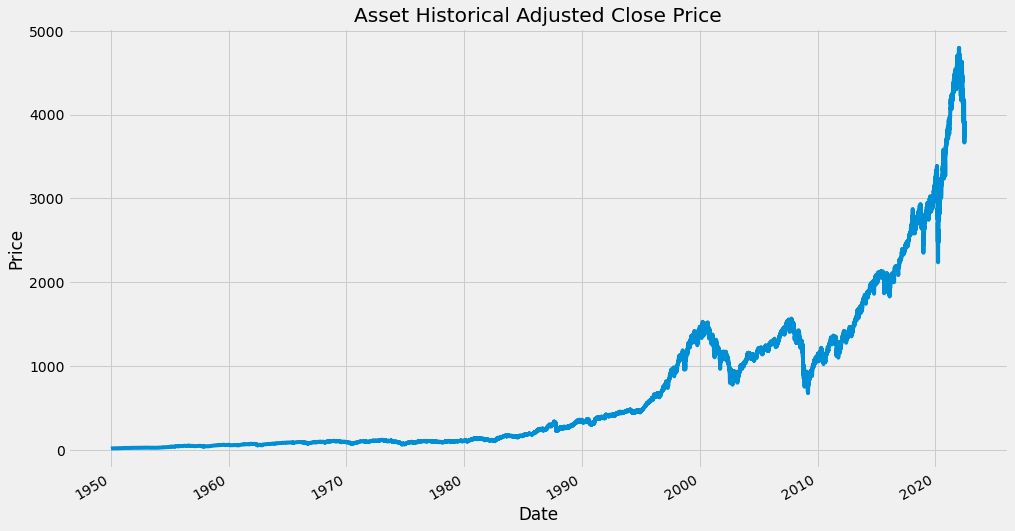

In [3]:
asset['Adj Close'].plot(figsize=(15, 9));
plt.title('Asset Historical Adjusted Close Price');
plt.xlabel('Date');
plt.ylabel('Price');

In [4]:
adj_close = asset['Adj Close'].loc['1990':]
# Choose initial investment price
initial_investment = 10000

## Calculate Lump Sum investment strategy

In [5]:
# Get the latest price of the asset
latest_value = adj_close[-1]
# Get number of shares bought on each date with the initial investment
n_shares_bought = initial_investment / adj_close
# Calculate how much money you earned
lump_sum = latest_value * n_shares_bought

lump_sum

Date
1990-01-02    108409.459711
1990-01-03    108690.483239
1990-01-04    109634.766373
1990-01-05    110714.927532
1990-01-08    110217.354607
                  ...      
2022-07-01     10193.577556
2022-07-05     10177.455159
2022-07-06     10141.218918
2022-07-07      9991.697285
2022-07-08     10000.000000
Name: Adj Close, Length: 8193, dtype: float64

In [6]:
# Compute and show the best and worst day for a lump sum investment
print('The best day to invest a ' + str(initial_investment) + '$ lump sum was '+lump_sum.idxmax().strftime('%b %d %Y') +
     ', and today would be worth $' + str(round(lump_sum.max(), 2)))
print('The worst day to invest a ' + str(initial_investment) + '$ lump sum was '+lump_sum.idxmin().strftime('%b %d %Y') +
     ', and today would be worth $' + str(round(lump_sum.min(), 2)))

The best day to invest a 10000$ lump sum was Oct 11 1990, and today would be worth $131976.58
The worst day to invest a 10000$ lump sum was Jan 03 2022, and today would be worth $8129.53


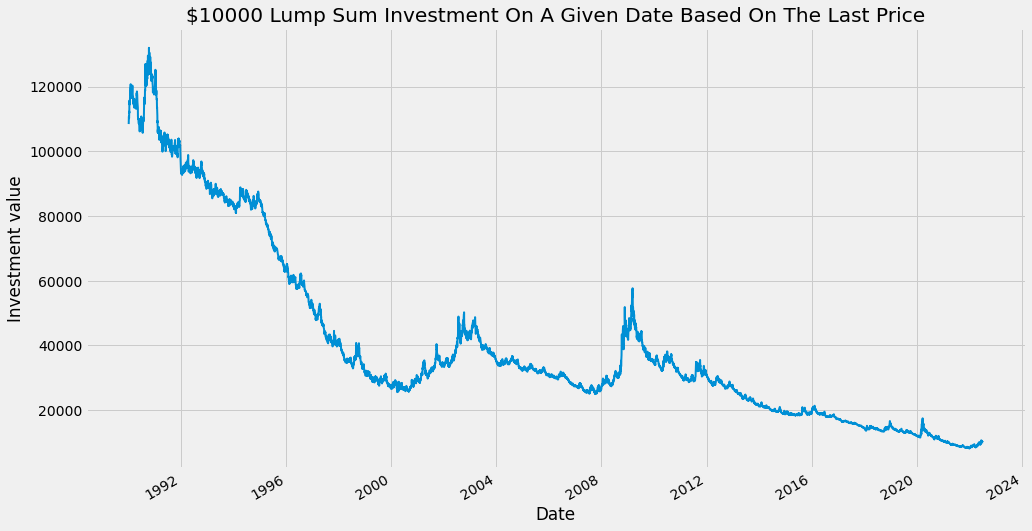

In [7]:
# Plot the lump sum data
lump_sum.plot(figsize=(15, 9), lw=2)
plt.title('$'+str(initial_investment)+' Lump Sum Investment On A Given Date Based On The Last Price');
plt.xlabel('Date');
plt.ylabel('Investment value');

## Calculate Dollar Cost Averaging Investment Strategy

In [8]:
def DCA(start_date, initial_investment, periods):
    # Get the investment periods
    investment_date_periods = periods
    # Calculate the amount to invest in each period
    investment_portion = initial_investment / investment_date_periods
    # Get dates of investment periods
    all_investment_dates = pd.date_range(start_date, periods=investment_date_periods, freq='30D')
    # Get dates up to the last date in our data set
    investment_dates = all_investment_dates[all_investment_dates < adj_close.index[-1]]
    # Get the indices that are the closest to the investment date
    closest_investment_dates = adj_close.index.searchsorted(investment_dates)
    # Get a list of stock prices at the closest investment date
    stock_prices = adj_close[closest_investment_dates]
    # Get the total number of shares we invested in
    total_shares_invested = sum(investment_portion / stock_prices)
    # Get the cash that was not invested fromm the initial investment amount
    uninvested_cash = investment_portion * sum(all_investment_dates >= adj_close.index[-1])
    # Calculate total
    total = uninvested_cash + adj_close[-1] * total_shares_invested
    
    return total

In [9]:
dca_list = []
for date in adj_close.index:
    dca_list.append(DCA(date, initial_investment, 360))

In [10]:
# Convert list to a series
dca = pd.DataFrame(dca_list, columns=['DCA']).set_index(pd.DatetimeIndex(adj_close.index)).squeeze()
dca

Date
1990-01-02    43357.631601
1990-01-03    43335.966647
1990-01-04    43337.698318
1990-01-05    43329.824222
1990-01-08    43289.974966
                  ...     
2022-07-01    10000.537715
2022-07-05    10000.492931
2022-07-06    10000.392275
2022-07-07     9999.976937
2022-07-08    10000.000000
Name: DCA, Length: 8193, dtype: float64

In [11]:
# Compute and show the best and worst day for a DCA investment
print('The best day to invest a ' + str(initial_investment) + '$ lump sum was '+dca.idxmax().strftime('%b %d %Y') +
     ', and today would be worth $' + str(round(dca.max(), 2)))
print('The worst day to invest a ' + str(initial_investment) + '$ lump sum was '+dca.idxmin().strftime('%b %d %Y') +
     ', and today would be worth $' + str(round(dca.min(), 2)))

The best day to invest a 10000$ lump sum was Jan 02 1990, and today would be worth $43357.63
The worst day to invest a 10000$ lump sum was Apr 08 2021, and today would be worth $9953.36


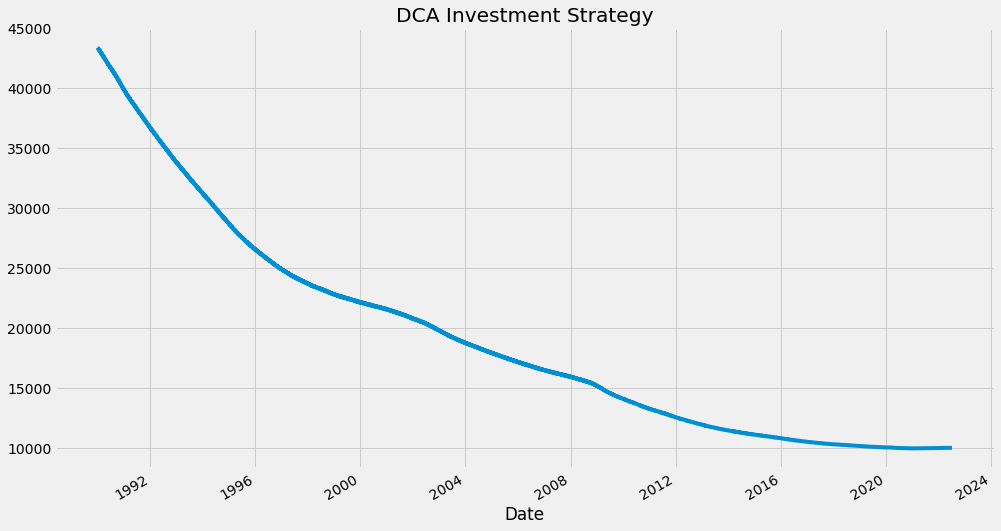

In [12]:
dca.plot(figsize=(15, 9))
plt.title('DCA Investment Strategy');

## Get the volatility

In [32]:
ls_vol = lump_sum.pct_change().std()
dca_vol = dca.pct_change().std()

print('Lump Sum Volatility:', round(ls_vol, 4))
print('DCA Volatility:', round(dca_vol, 4))

Lump Sum Volatility: 0.0115
DCA Volatility: 0.0007


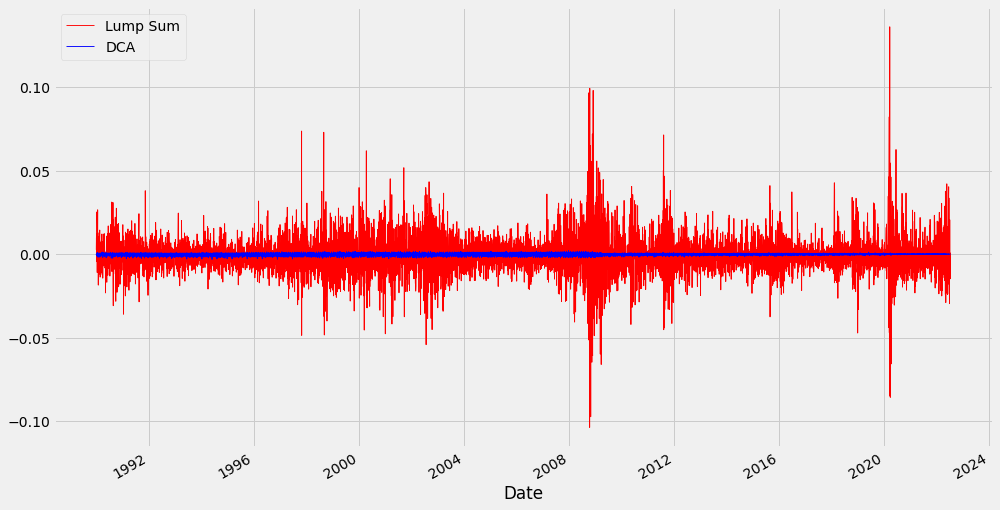

In [28]:
lump_sum.pct_change().plot(figsize=(15, 9), color='red', lw=0.9, label= 'Lump Sum');
dca.pct_change().plot(figsize=(15, 9), color='blue', lw=0.9);
plt.legend();

## Calculate the difference between the returns of the investment startegies

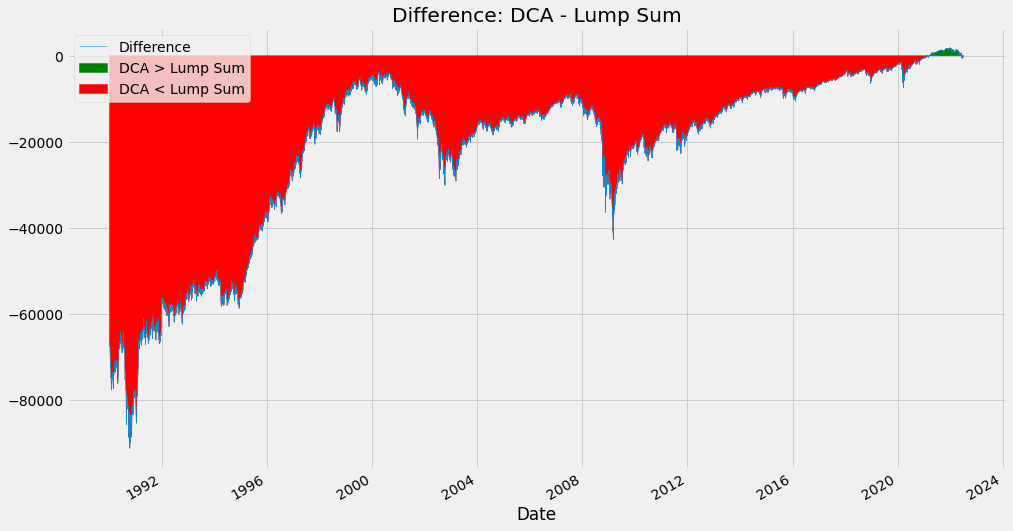

In [14]:
difference = dca - lump_sum
difference.plot(figsize=(15, 9), label='Difference', lw=0.5);
plt.fill_between(difference.index, y1=difference, y2=0, color='green', where=difference>0, label='DCA > Lump Sum');
plt.fill_between(difference.index, y1=difference, y2=0, color='red', where=difference<0, label='DCA < Lump Sum');
plt.title('Difference: DCA - Lump Sum');
plt.legend();

## Calculate the win percentages

In [15]:
ls_win_perc = round(sum(difference< 0) / len(difference) * 100, 1)
dca_win_perc = round(sum(difference> 0) / len(difference) * 100, 1)

print('Lump Sum returned more than DCA: ' + str(ls_win_perc) + '% of the time')
print('DCA returned more than Lump Sum: ' + str(dca_win_perc) + '% of the time')

Lump Sum returned more than DCA: 96.1% of the time
DCA returned more than Lump Sum: 3.9% of the time
